In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
media_enem_por_municipio = pd.read_csv('dados/mediaEnemPorMunicipio.csv', index_col=0)
media_enem_por_municipio.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
0,1100015,Alta Floresta D'Oeste,11,RO,496.889946,504.748900,489.632149,499.570736,484.940778
1,1100023,Ariquemes,11,RO,501.552695,500.928743,495.369860,495.123846,481.864242
2,1100031,Cabixi,11,RO,496.470238,491.966667,474.902222,478.880952,448.444444
3,1100049,Cacoal,11,RO,507.851118,508.909263,500.260129,504.318945,494.608021
4,1100056,Cerejeiras,11,RO,507.490759,506.660725,493.587915,506.162706,491.842900


In [22]:
idhm_excel = pd.read_excel('dados/atlas2013_dadosbrutos_pt.xlsx', sheet_name=1)

In [23]:
idhm_excel.head()

,ANO,UF,Codmun6,Codmun7,Município,ESPVIDA,FECTOT,MORT1,MORT5,RAZDEP,...,PIA1517,PIA18M,POP,POPT,I_ESCOLARIDADE,I_FREQ_PROP,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1991,11,110001,1100015,ALTA FLORESTA D'OESTE,62.01,4.08,45.58,58.05,73.50,...,NaN,NaN,23417,22835,0.117,0.109,0.329,0.112,0.617,0.516
1,1991,11,110002,1100023,ARIQUEMES,66.02,3.72,32.39,41.41,69.97,...,NaN,NaN,56061,55018,0.200,0.199,0.432,0.199,0.684,0.593
2,1991,11,110003,1100031,CABIXI,63.16,3.89,41.52,52.94,77.23,...,NaN,NaN,7601,5846,0.111,0.106,0.309,0.108,0.636,0.430
3,1991,11,110004,1100049,CACOAL,65.03,3.81,35.37,45.19,71.11,...,NaN,NaN,69173,66534,0.176,0.169,0.407,0.171,0.667,0.593
4,1991,11,110005,1100056,CEREJEIRAS,62.73,3.55,43.00,54.82,71.09,...,NaN,NaN,19451,19030,0.152,0.175,0.386,0.167,0.629,0.547


In [24]:
idhm_filtrado = idhm_excel.filter(items=['ANO', 'UF', 'Codmun6', 'Codmun7', 'Município', 'IDHM', 'IDHM_E', 'IDHM_L', 'IDHM_R']).query('ANO == 2010')

In [25]:
idhm_filtrado.head()

,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
11130,2010,11,110001,1100015,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
11131,2010,11,110002,1100023,ARIQUEMES,0.702,0.600,0.806,0.716
11132,2010,11,110003,1100031,CABIXI,0.650,0.559,0.757,0.650
11133,2010,11,110004,1100049,CACOAL,0.718,0.620,0.821,0.727
11134,2010,11,110005,1100056,CEREJEIRAS,0.692,0.602,0.799,0.688


In [26]:
idhm_filtrado.to_csv('dados/dadosAtlas.csv')

In [27]:
enem_idhm = pd.merge(media_enem_por_municipio, idhm_filtrado, how='left', left_on=['CO_MUNICIPIO_RESIDENCIA'], right_on=['Codmun7'])

In [28]:
enem_idhm.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1100015,Alta Floresta D'Oeste,11,RO,496.889946,504.748900,489.632149,499.570736,484.940778,2010.0,11.0,110001.0,1100015.0,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
1,1100023,Ariquemes,11,RO,501.552695,500.928743,495.369860,495.123846,481.864242,2010.0,11.0,110002.0,1100023.0,ARIQUEMES,0.702,0.600,0.806,0.716
2,1100031,Cabixi,11,RO,496.470238,491.966667,474.902222,478.880952,448.444444,2010.0,11.0,110003.0,1100031.0,CABIXI,0.650,0.559,0.757,0.650
3,1100049,Cacoal,11,RO,507.851118,508.909263,500.260129,504.318945,494.608021,2010.0,11.0,110004.0,1100049.0,CACOAL,0.718,0.620,0.821,0.727
4,1100056,Cerejeiras,11,RO,507.490759,506.660725,493.587915,506.162706,491.842900,2010.0,11.0,110005.0,1100056.0,CEREJEIRAS,0.692,0.602,0.799,0.688


In [29]:
# Função para converter dados de uma Series
# enem_idhm['IDHM'] = enem_idhm.apply(lambda x: str(x).replace(',', '.'))

In [30]:
enem_idhm.dtypes

CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
CO_UF_RESIDENCIA             int64
SG_UF_RESIDENCIA            object
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
ANO                        float64
UF                         float64
Codmun6                    float64
Codmun7                    float64
Município                   object
IDHM                       float64
IDHM_E                     float64
IDHM_L                     float64
IDHM_R                     float64
dtype: object

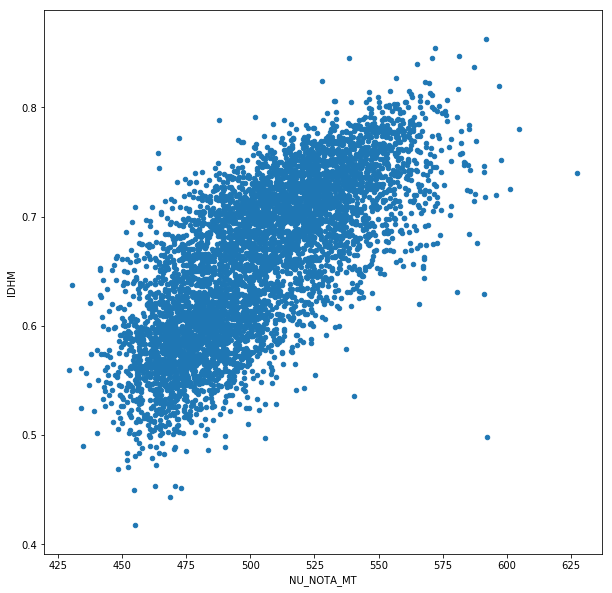

In [31]:
enem_idhm.plot.scatter('NU_NOTA_MT', 'IDHM', figsize=(10, 10))

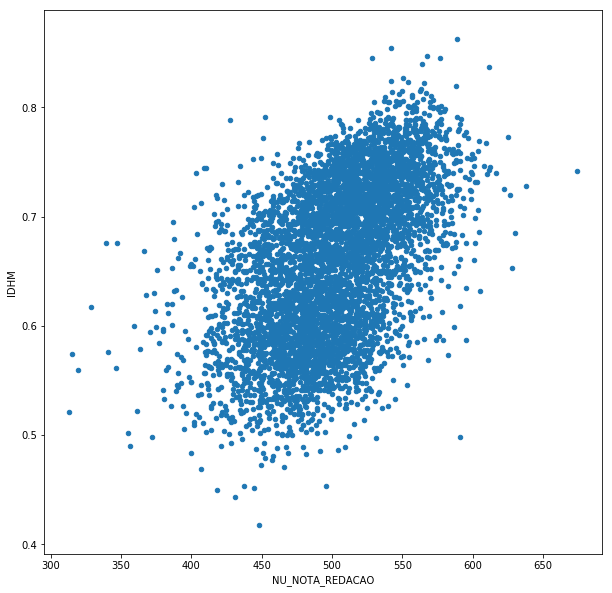

In [32]:
enem_idhm.plot.scatter('NU_NOTA_REDACAO', 'IDHM', figsize=(10, 10))

In [33]:
mean_redacao = enem_idhm['NU_NOTA_REDACAO'].mean()
mean_idhm = enem_idhm['IDHM'].mean()

In [34]:
mean_redacao

501.47418703331164

In [35]:
mean_idhm

0.6591574123989226

In [36]:
quadrante1 = (enem_idhm['IDHM'] < mean_idhm) & (enem_idhm['NU_NOTA_REDACAO'] < mean_redacao)
quadrante2 = (enem_idhm['IDHM'] > mean_idhm) & (enem_idhm['NU_NOTA_REDACAO'] < mean_redacao)
quadrante3 = (enem_idhm['IDHM'] > mean_idhm) & (enem_idhm['NU_NOTA_REDACAO'] > mean_redacao)
quadrante4 = (enem_idhm['IDHM'] < mean_idhm) & (enem_idhm['NU_NOTA_REDACAO'] > mean_redacao)

In [37]:
mediaEnemIDHM1 = enem_idhm[quadrante1]
mediaEnemIDHM2 = enem_idhm[quadrante2]
mediaEnemIDHM3 = enem_idhm[quadrante3]
mediaEnemIDHM4 = enem_idhm[quadrante4]

In [38]:
mediaEnemIDHM1.head()

,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,ANO,UF,Codmun6,Codmun7,Município,IDHM,IDHM_E,IDHM_L,IDHM_R
0,1100015,Alta Floresta D'Oeste,11,RO,496.889946,504.748900,489.632149,499.570736,484.940778,2010.0,11.0,110001.0,1100015.0,ALTA FLORESTA D'OESTE,0.641,0.526,0.763,0.657
2,1100031,Cabixi,11,RO,496.470238,491.966667,474.902222,478.880952,448.444444,2010.0,11.0,110003.0,1100031.0,CABIXI,0.650,0.559,0.757,0.650
6,1100072,Corumbiara,11,RO,502.360606,490.081651,483.553211,494.472727,449.357798,2010.0,11.0,110007.0,1100072.0,CORUMBIARA,0.613,0.473,0.774,0.630
7,1100080,Costa Marques,11,RO,478.920889,486.232766,476.691489,481.384000,437.531915,2010.0,11.0,110008.0,1100080.0,COSTA MARQUES,0.611,0.493,0.751,0.616
9,1100106,Guajará-Mirim,11,RO,478.986531,478.108919,478.306677,470.301759,428.766565,2010.0,11.0,110010.0,1100106.0,GUAJARÁ-MIRIM,0.657,0.519,0.823,0.663


quadratne 1: 33.710691823899374% baixo IDHM, baixa nota
quadratne 2: 14.77088948787062% alto IDHM, baixa nota
quadratne 3: 37.75381850853549% alto IDHM, alta nota
quadratne 4: 13.764600179694519% baixo IDHM, alta nota


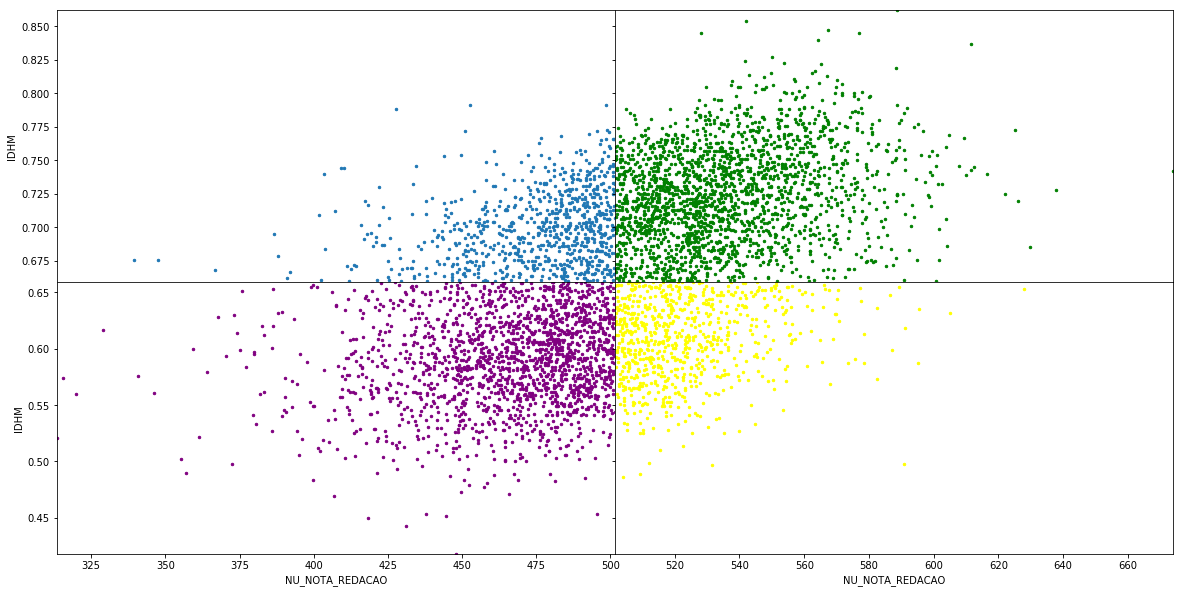

In [56]:
fig, ax = plt.subplots(2, 2, figsize=(20,10), sharex='col', sharey='row')

plt.subplots_adjust(wspace=0, hspace=0)

min_redacao = enem_idhm['NU_NOTA_REDACAO'].min()
max_redacao = enem_idhm['NU_NOTA_REDACAO'].max()
min_idhm = enem_idhm['IDHM'].min()
max_idhm = enem_idhm['IDHM'].max()


mediaEnemIDHM1.plot.scatter('NU_NOTA_REDACAO', 'IDHM', s=6, ax=ax[1,0], xlim=(min_redacao, mean_redacao), ylim=(min_idhm, mean_idhm), color='purple')
print('quadratne 1: {}% baixo IDHM, baixa nota'.format(100*len(mediaEnemIDHM1.IDHM) / len(idhm_filtrado)))

mediaEnemIDHM2.plot.scatter('NU_NOTA_REDACAO', 'IDHM', s=6,ax=ax[0,0], xlim=(min_redacao, mean_redacao), ylim=(mean_idhm, max_idhm))
print('quadratne 2: {}% alto IDHM, baixa nota'.format(100*len(mediaEnemIDHM2.IDHM) / len(idhm_filtrado)))


mediaEnemIDHM3.plot.scatter('NU_NOTA_REDACAO', 'IDHM', s=6, ax=ax[0,1], xlim=(mean_redacao, max_redacao), ylim=(mean_idhm, max_idhm), color='green')
print('quadratne 3: {}% alto IDHM, alta nota'.format(100*len(mediaEnemIDHM3.IDHM) / len(idhm_filtrado)))

mediaEnemIDHM4.plot.scatter('NU_NOTA_REDACAO', 'IDHM', s=6, ax=ax[1,1], xlim=(mean_redacao, max_redacao), ylim=(min_idhm, mean_idhm), color='yellow')
print('quadratne 4: {}% baixo IDHM, alta nota'.format(100*len(mediaEnemIDHM4.IDHM) / len(idhm_filtrado)))